In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("ruspini.csv")
df.head()

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       75 non-null     int64
 1   y       75 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


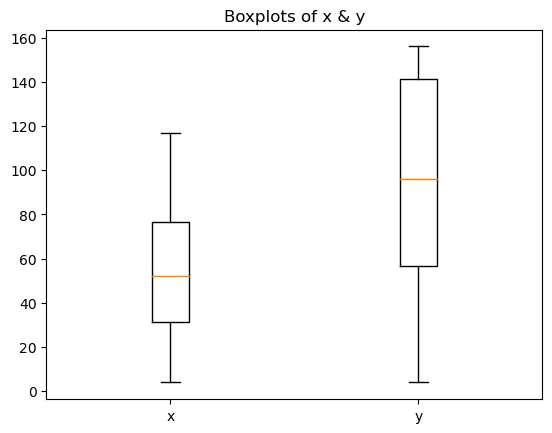

In [28]:
# Distribution of the data

plt.boxplot([df['x'], df['y']], labels = ['x','y'])
plt.title("Boxplots of x & y");

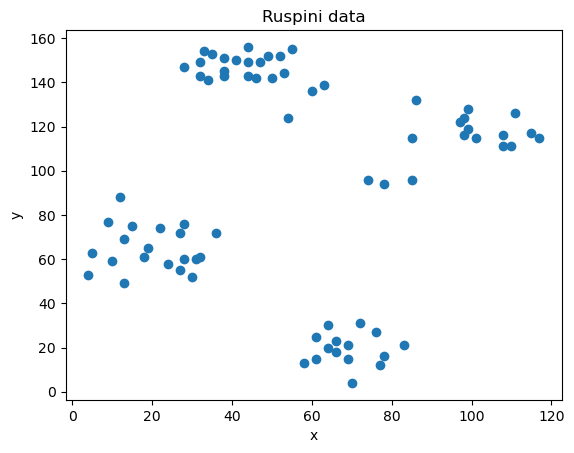

In [29]:
# Scatterplot Ruspini

plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Ruspini data");

So there 4 clusters as we can see on the scatterplot but let's confirm this with the elbow method based on the distorsion

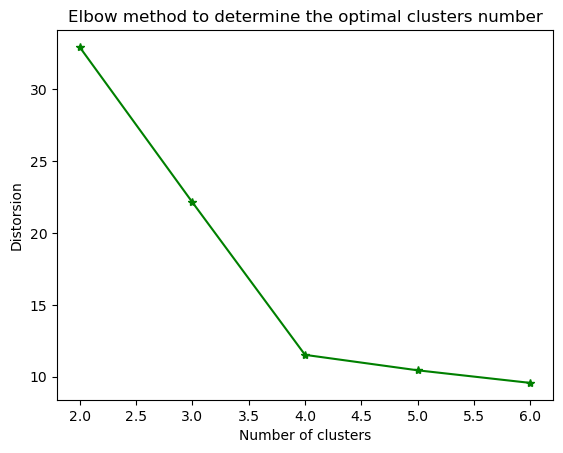

In [49]:
# Elbow method

distorsion = []
n = len(df)
clust = [2,3,4,5,6]

for k in clust :
    model = KMeans(n_clusters = k)
    model.fit(df)
    distorsion.append(sum(np.min(cdist(df, model.cluster_centers_), axis = 1) * (1/n)))

plt.plot(range, distorsion, 'g*-')
plt.xlabel('Number of clusters')
plt.ylabel('Distorsion')
plt.title('Elbow method to determine the optimal clusters number');

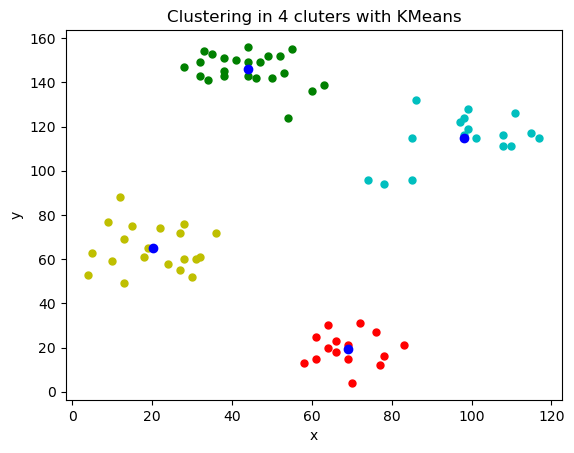

In [48]:
# Modelisation with 4 clusters

kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualization

colors = ["g.","r.","c.","y."]

for i in np.arange(len(df)) :
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:,0], centroids[:,1], color = "blue", zorder= 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Clustering in 4 cluters with KMeans");